In [1]:
import sys


PACKAGE_PARENT = '../../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.evaluate.eval_agents import EvaluateGameSA
from alphaslime.agents.other.semiGradSarsa import SemiGradSarsa
from alphaslime.agents.other.dqnAgent import DQNAgent
from alphaslime.approx.linearq import LinearQApprox
from alphaslime.approx.dqn import DQN

from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym
import csv

import time
import torch

In [2]:
env_id = 'CartPole-v1'
env_id = 'CartPole-v0'
env = gym.make(env_id)
n_actions = env.action_space.n
len_obs_space = env.observation_space.shape[0]

print('n_actions = {}'.format(n_actions))
print('len_obs_space = {}'.format(len_obs_space))
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_actions = 2
len_obs_space = 4


In [3]:
# config intial properties

gamma = 0.99
epsilon = 1
learning_rate = 0.001
EPISODES = 10000
MINI_BATCH_SIZE = 64
MEMORY_SIZE = 10000
TARGET_UPDATE = 10

training_episodes = 1000
observation_dimension=4
action_table = [0, 1]

env_id = 'CartPole-v1'
env_id = 'CartPole-v0'
env = gym.make(env_id)
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# env = gym.make('MountainCar-v0')
# epsilon = 0
# gamma  = 1
# learning_rate = 0.0625
# # observation_dimension=2
# # training_episodes = 200
# action_table = [0, 1, 2]

n_actions = env.action_space.n
len_obs_space = env.observation_space.shape[0]

print('n_actions = {}'.format(n_actions))
print('len_obs_space = {}'.format(len_obs_space))
# q function approximator
hidden_layer_size = 16
layer_sizes = [len_obs_space, hidden_layer_size, n_actions]
q_hat = DQN(lr=learning_rate, layer_sizes=layer_sizes, device=device).to(device)

# set config file for agent
config = {
    'lr': learning_rate,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    't_max': None,
    'max_score': None,
    'episode_printer': 100,
    'env': env,
    'q_hat': q_hat,
    'batch_size': MINI_BATCH_SIZE,
    'exp_mem_size': MEMORY_SIZE,
    'TARGET_UPDATE': TARGET_UPDATE
}



n_actions = 2
len_obs_space = 4


In [4]:
agent = DQNAgent(config)

# reset replay memory
avg_scores = agent.train(EPISODES=EPISODES, is_progress=True)
# total_rewards = np.sum(rewards[0, 0,:])
rewards = np.array(agent.rewards)
print(rewards.shape)

100%|██████████| 1000/1000 [04:24<00:00,  3.78it/s]

(1000,)


length of scores:  1000 , len of avg_scores:  1000


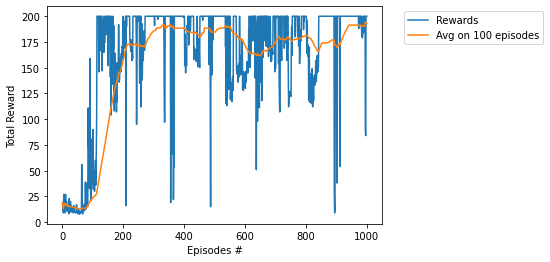

In [5]:
print('length of scores: ', len(rewards), ', len of avg_scores: ', len(avg_scores))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards)+1), rewards, label="Rewards")
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, label="Avg on 100 episodes")
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.ylabel('Total Reward')
plt.xlabel('Episodes #')
plt.show()

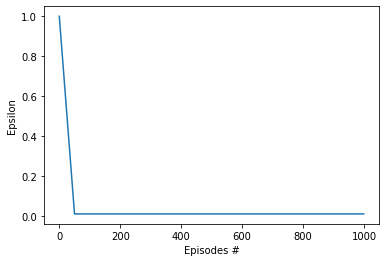

In [6]:
plt.plot(agent.epsilon_list)
plt.ylabel('Epsilon')
plt.xlabel('Episodes #')
plt.show()

In [7]:
BASE_PATH = "./models/"
# save model
model_info = str(learning_rate)+ '_' + str(gamma)
path = BASE_PATH + 'model' + '_' + model_info + '.pt'
q_name = 'q_approx_state_dict_' + model_info

agent.save_q_model(path)

100%|██████████| 100/100 [00:02<00:00, 40.84it/s]


average reward per episode : 196.98
average reward per episode= 196.98


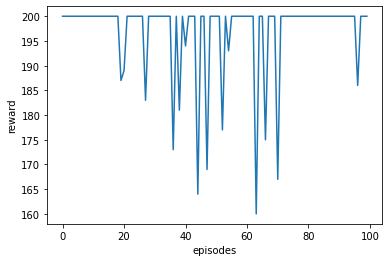

In [8]:
from tqdm import tqdm
from time import sleep
# load model
env = gym.make('CartPole-v0')
# env = gym.make('CartPole-v1')


len_obs_space = env.observation_space.shape[0]
n_actions = env.action_space.n


epsilon = 0
hidden_layer_size = 16
layer_sizes = [len_obs_space, hidden_layer_size, n_actions]
q_hat = DQN(lr=learning_rate, layer_sizes=layer_sizes, device=device).to(device)

# set config file for agent
config = {
    'lr': learning_rate,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    't_max': None,
    'max_score': None,
    'episode_printer': 100,
    'env': env,
    'q_hat': q_hat,
    'batch_size': MINI_BATCH_SIZE,
    'exp_mem_size': MEMORY_SIZE,
    'TARGET_UPDATE': TARGET_UPDATE
}
agent = DQNAgent(config)

PATH = './models/model_0.001_0.99.pt'
agent.load_q_model(PATH)

reward_arr = []
for i in tqdm(range(100)):
    obs, done, rew = env.reset(), False, 0
    while not done:
        A = agent.get_action(obs)
        obs, reward, done, info = env.step(A.item())
        rew += reward
        # sleep(0.01)
        # env.render()

    reward_arr.append(rew)
env.close()
print("average reward per episode :", sum(reward_arr) / len(reward_arr))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(reward_arr)
plt.plot(rewards)
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()